In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_pd = pd.read_csv(city_data_to_load)
ride_pd = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

merge_df = pd.merge(city_pd, ride_pd, on="city")

# Display the data table for preview
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
city_group = merge_df.groupby("city")
ave_fare = city_group.mean()["fare"]
total_rides_per_city = city_group["ride_id"].count()
total_drivers_per_city = city_group["driver_count"].mean()
city_type=city_pd.set_index("city")["type"]

In [5]:
pyber_df = pd.DataFrame({"Average Fare Per City":ave_fare,
                 "Number of Rides": total_rides_per_city,
                 "Number of Drivers": total_drivers_per_city,
                 "City Type": city_type
})
pyber_df.head()

,Average Fare Per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

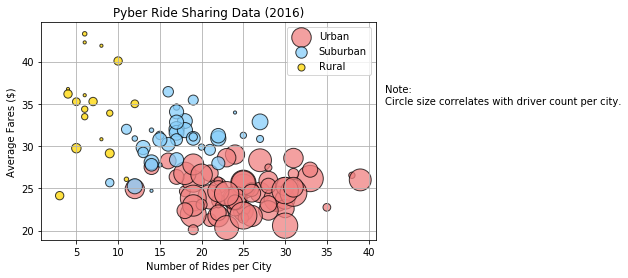

In [27]:
# Obtain the x and y coordinates for each of the three city types
urban = pyber_df.loc[pyber_df["City Type"]== "Urban"]

suburban = pyber_df.loc[pyber_df["City Type"]== "Suburban"]

rural = pyber_df.loc[pyber_df["City Type"]== "Rural"]


# Build the scatter plots for each city types

plt.scatter(urban["Number of Rides"],urban["Average Fare Per City"] , marker="o", label="Urban",
                        facecolors="lightcoral", edgecolors="black", s=10*urban["Number of Drivers"], alpha=0.75)

plt.scatter(suburban["Number of Rides"],suburban["Average Fare Per City"] , marker="o", label="Suburban",
                        facecolors="lightskyblue", edgecolors="black", s= 10*suburban["Number of Drivers"], alpha=0.75)

plt.scatter(rural["Number of Rides"],rural["Average Fare Per City"] , marker="o", label="Rural",
                        facecolors="gold", edgecolors="black", s=10* rural["Number of Drivers"], alpha=0.75)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Number of Rides per City")
plt.ylabel("Average Fares ($)")
plt.text(42,35,"Note:"+ "\n"+ "Circle size correlates with driver count per city.")


# Create a legend

plt.legend(loc= "upper right")

# Incorporate a text label regarding circle size

plt.grid()

# Save Figure
plt.savefig("Images/Pyber_scatter.png")

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

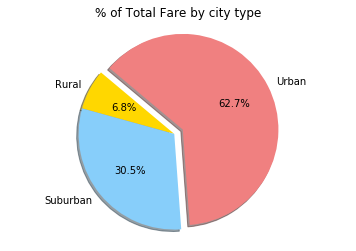

In [26]:
# Calculate Type Percents
types = ["Rural","Suburban","Urban"]
total_fare= merge_df.groupby(["type"])["fare"].sum()
explode = (0,0, 0.1)
colors=[ "gold", "lightskyblue","lightcoral"]

# Build Pie Chart

plt.pie(total_fare,explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fare by city type")

#Save Figure
plt.savefig("Images/Pyber_Pie1.png")

In [13]:
# Show Figure
plt.show()

## Total Rides by City Type

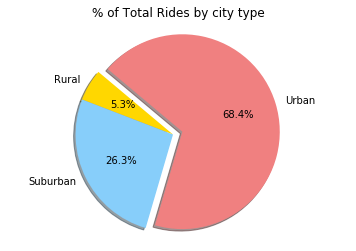

In [28]:
# Calculate Ride Percents

types = ["Rural","Suburban","Urban"]
total_rides= pyber_df.groupby(["City Type"])["Number of Rides"].sum()
explode = (0,0, 0.1)
colors=[ "gold", "lightskyblue","lightcoral"]

# Build Pie Chart

plt.pie(total_rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by city type")

# Save Figure
plt.savefig("Images/Pyber_Pie2.png")

In [14]:
# Show Figure
plt.show()

## Total Drivers by City Type

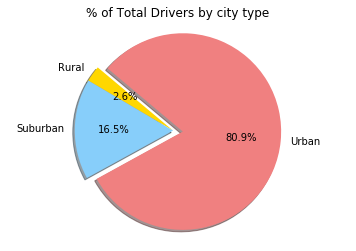

In [29]:
# Calculate Driver Percents
types = ["Rural","Suburban","Urban"]
total_drivers= pyber_df.groupby(["City Type"])["Number of Drivers"].sum()
explode = (0,0, 0.1)
colors=[ "gold", "lightskyblue","lightcoral"]

# Build Pie Charts

plt.pie(total_drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by city type")

# Save Figure
plt.savefig("Images/Pyber_Pie3.png")

In [ ]:
# Show Figure
plt.show()